In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from scipy import optimize
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF

In [2]:
wk = list(np.arange(1,261,1))
df = pd.read_csv("product_demand_raw.csv", names = ['demand'])
df['week'] = wk
df

,demand,week
0,29030.001,1
1,28930.000,2
2,28830.000,3
3,29020.000,4
4,27000.000,5
...,...,...
255,44509.998,256
256,44400.002,257
257,43060.001,258
258,43369.999,259


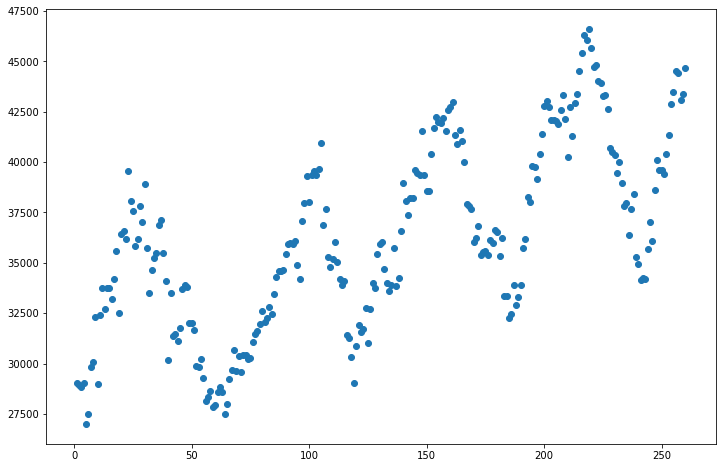

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(df['week'], df['demand'])
plt.show()

In [21]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(x, a, b, c, d, e):  return a*x + c * np.sin(d*x - e) + b
    popt, pcov = sci.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    a,b,c,d,e = popt
    f = d/(2.*np.pi)
    fitfunc = lambda x: a*x + c * np.sin(d*x - e) + b
    return {"amp": c, "omega": d, "phase": -e, "offset": b, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [22]:
res = fit_sin(df['week'],df['demand'])

TypeError: sinfunc() missing 1 required positional argument: 'e'

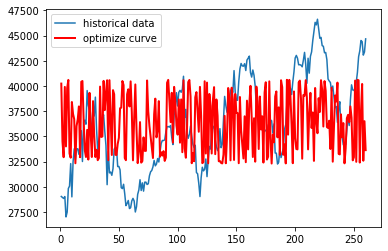

In [16]:
plt.plot(df['week'],df['demand'],label= "historical data")
plt.plot(df['week'], res["fitfunc"](df['demand']), "r-", label= 'optimize curve', linewidth=2)
plt.legend(loc="best")
plt.show()

# plt.figure(figsize=(6, 4))
# plt.scatter(df['week'],df['demand'],label='Data')
# plt.plot(df['week'], test_func(df['week'], params[0], params[1]),
#          label='Fitted function')

# plt.legend(loc='best')

# plt.show()

In [40]:
# def func(x, a, b, c, d , e):
#     return a*x + c * np.sin(d*x - e) + b

def sinfunc(x, a, b):
    return a * np.sin(b * x)

popt, pcov = curve_fit(sinfunc, df['week'], df['demand'])
print(popt)
# print(pcov)

[364.76970725   1.55460966]


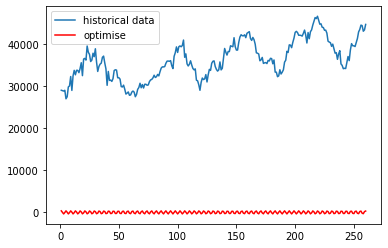

In [43]:
plt.plot(df['week'],df['demand'],label= "historical data")
plt.plot(df['week'], sinfunc(df['week'], popt[0], popt[1]), 'r-', label = 'optimise')
plt.legend()
plt.show()

In [49]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

# Random seeds
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0

# Generate features, and take norm for use with target
x = np.array(df['week']).reshape(1,-1)
y = np.array(list(df['demand'])).reshape(1,-1)

# Create kernel and define GPR
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(x, y)

# Create test data
x_test = df['week']
y_test = df['demand']
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test, return_std=True)

# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Squeeze data
x = np.squeeze(x)
y = np.squeeze(y)
x_test = np.squeeze(x_test)
y_test = np.squeeze(y_test)

# Plot the training data
ax.scatter(x, y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, 'b')

# Shade between the lower and upper confidence bounds
lower = x_test - y_sigma
upper = x_test + y_sigma
ax.fill_between(x_test, lower, upper, alpha=0.5)
ax.set_ylim([-3, 3])
plt.title("GPR Model Predictions")
plt.show()

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


ValueError: Expected 2D array, got 1D array instead:
array=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.